# Сборный проект
## Описание проекта
Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности, которые помогут сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

#### Описание данных
- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


## Шаг 1. Откроем файл с данными и изучим общую информацию <a class="anchor" id="first-bullet"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/datasets/games.csv')

In [3]:
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
df.duplicated().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


- Данные содержат строчные и прописные символы. Переведем все данные в нижний региср.
- Дубликатов на данном этапе не обнаружено. Перепроверим это после всех изменений с данными.
- Данные содержат пропуски. Рассморим их подробнее дальше.
- Тип данных в некоторых столбцах можно заменить (например, в `User_Score`). Заменять будем, скорее всего, на `float`, т.к. таблица содержить `NaN`.

## Шаг 2. Подготовка данных

Переведем данные в нижний регистр.

In [6]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [7]:
for column in ['name', 'platform', 'genre']:
    df[column] = df[column].str.lower()

In [8]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Рассмотрим каждый столбец отдельно.

#### Столбец `name`

In [9]:
df['name'].describe()

count                           16713
unique                          11559
top       need for speed: most wanted
freq                               12
Name: name, dtype: object

- В таблице есть одни и те же игры, которые, вероятно, выходили под разные игровые платформы.

In [10]:
df['name'].isnull().sum()

2

In [11]:
df.query('name.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


- Если платформа `gen` - это Sega Mega Drive/Genesis, то в 1993 году для не вышло несколько игр:
    - 15 марта — "Sunsoft" выпустила "Blaster Master 2".
    - 9 сентября — "Treasure" дебютировала с игрой "Gunstar Heroes".
    - 23 сентября — "Treasure" выпустила игру "McDonald's Treasure Land Adventure".
- В результате строки с пропущенными названиями игр удаляем, потому что определить, какое название игры пропущено сложно. Кроме этого, данные в этих строках имеют пропуски и по другим столбцам.

In [12]:
df.shape

(16715, 11)

In [13]:
df = df.loc[df['name'].notnull()]

In [14]:
df.shape

(16713, 11)

- Строки удалены.

#### Столбец `platform`

In [15]:
df['platform'].describe()

count     16713
unique       31
top         ps2
freq       2161
Name: platform, dtype: object

Чаще других упоминается приставка PlayStation2, выпущенная компанией Sony.
Посмотрим на то, какие еще игровые платформы представлены в исходной таблице.

In [16]:
df['platform'].value_counts()

ps2     2161
ds      2151
ps3     1331
wii     1320
x360    1262
psp     1209
ps      1197
pc       974
xb       824
gba      822
gc       556
3ds      520
psv      430
ps4      392
n64      319
xone     247
snes     239
sat      173
wiiu     147
2600     133
gb        98
nes       98
dc        52
gen       27
ng        12
ws         6
scd        6
3do        3
tg16       2
pcfx       1
gg         1
Name: platform, dtype: int64

In [17]:
df['platform'].isnull().sum()

0

#### Столбец `year_of_release`

In [18]:
df['year_of_release'].describe()

count    16444.000000
mean      2006.486256
std          5.875525
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

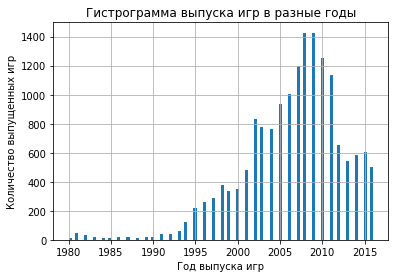

Больше всего игр выпущено в 2008 году.


In [19]:
plt.hist(df['year_of_release'], bins = 100)
plt.grid()
plt.xlabel('Год выпуска игр')
plt.ylabel('Количество выпущенных игр')
plt.title('Гистрограмма выпуска игр в разные годы')
plt.show()
print('Больше всего игр выпущено в', int(df['year_of_release'].mode()[0]), 'году.')

 - Два года 2008 и 2009 лидеры по количеству выпущенных игр. Далее идет спад, который может быть связан с мировым экономическим кризисом 2008 года и/или концетрацией компаний на конкретных продуктах и их развитии.

In [20]:
df['year_of_release'].isnull().sum()

269

In [21]:
df['platform'].loc[df['year_of_release'].isnull()].unique()

array(['ps2', 'wii', '2600', 'x360', 'gba', 'pc', 'ps3', 'ps', 'psp',
       'xb', 'gb', 'ds', 'gc', '3ds', 'n64', 'psv'], dtype=object)

In [22]:
df['name'].loc[df['year_of_release'].isnull()].unique()

array(['madden nfl 2004', 'fifa soccer 2004',
       'lego batman: the videogame', 'wwe smackdown vs. raw 2006',
       'space invaders', 'rock band',
       "frogger's adventures: temple of the frog",
       'lego indiana jones: the original adventures', 'call of duty 3',
       'call of duty: black ops', 'triple play 99', 'adventure', 'combat',
       'lego harry potter: years 5-7', 'nascar thunder 2003',
       'hitman 2: silent assassin', 'legacy of kain: soul reaver',
       'donkey kong land iii', 'air-sea battle', 'suikoden iii',
       'wheel of fortune', 'yakuza 4', 'namco museum', 'rhythm heaven',
       'the lord of the rings: war in the north', 'madden nfl 07',
       'mlb slugfest 20-03', 'shaun white snowboarding',
       'pes 2009: pro evolution soccer', 'warioware: twisted!',
       'madden nfl 11', 'test drive unlimited 2',
       'the chronicles of narnia: the lion, the witch and the wardrobe',
       'monster hunter 2', 'metal gear solid 2: substance',
       'advanc

- Заполнить вручную год выпуска для каждой из игр не представляется разумным, т.к. таких игр очень много, и они могли выпускаться в разное время на разные игровые платформы. Оставляем пропуски, как есть.

In [23]:
df.shape

(16713, 11)

In [24]:
df = df.query('year_of_release.notnull()')

In [25]:
df.shape

(16444, 11)

#### Столбец `genre`

In [26]:
df['genre'].isnull().sum()

0

In [27]:
df['genre'].value_counts()

action          3307
sports          2306
misc            1721
role-playing    1481
shooter         1296
adventure       1293
racing          1226
platform         878
simulation       857
fighting         837
strategy         673
puzzle           569
Name: genre, dtype: int64

- Данные чистые

#### Столбцы `na_sales`, `eu_sales`, `jp_sales`, `other_sales`

In [28]:
for column in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']:
    if (df[column] < 0).sum():
        print('В столбце', column, 'есть отрицательные значения.')
    else:
        print('В столбце', column, 'отрицательных значений нет.')
        

В столбце na_sales отрицательных значений нет.
В столбце eu_sales отрицательных значений нет.
В столбце jp_sales отрицательных значений нет.
В столбце other_sales отрицательных значений нет.


#### Столбец `critic_score`

In [29]:
df['critic_score'].loc[df['critic_score'].notnull()].unique()

array([76., 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88., 83.,
       94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92., 71.,
       72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64., 75.,
       60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47., 65.,
       54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51., 40.,
       46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23., 24.,
       21., 17., 13.])

#### Столбец `user_score`

In [30]:
df['user_score'].loc[df['user_score'].notnull()].unique()

array(['8', '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4', '8.2',
       '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2', '8.9',
       '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3', '7.6',
       '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

- <b>tbd</b> - это рейтинг еще не присвоен (недостаточно данных).

In [31]:
df.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,zumba fitness,wii,2010.0,sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,namco museum: 50th anniversary,ps2,2005.0,misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,zumba fitness 2,wii,2011.0,sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,udraw studio,wii,2010.0,misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,just dance kids,wii,2010.0,misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,planet monsters,gba,2001.0,action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,bust-a-move 3000,gc,2003.0,puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,mega brain boost,ds,2008.0,puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,plushees,ds,2008.0,simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Данных с рейтингом <b>tbd</b> достаточно много. Поэтому заменяем рейтинг `tbd` на `NaN`, т.к. с `NaN` работает большинство математических операций.

In [32]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.NaN

In [33]:
df.iloc[119]

name               zumba fitness
platform                     wii
year_of_release             2010
genre                     sports
na_sales                    3.45
eu_sales                    2.59
jp_sales                       0
other_sales                 0.66
critic_score                 NaN
user_score                   NaN
rating                         E
Name: 119, dtype: object

Замена на `Nan` прошла успешно.

#### Столбец `rating`


In [34]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

- `E` - Содержание вполне подходит для возрастной категории от 6 лет и старше; такие игры могут понравиться и взрослым. 
- `M` - «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет.
- `T` - «Подросткам»: Игра подходит для лиц от 13 лет и старше.
- `E10+` - «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены или минимальное количество крови.
- `K-A` - "Kids to Adults". Это тоже самое, что и `E («Everyone»)`. Поэтому переименуем в дальнейшем в таблице значения `K-A` в `E`.
- `AO` - «Только для взрослых»: Содержание игры только для взрослых старше 18 лет.
- `EC` - Для детей младшего возраста»: Игра подходит для детей от 3 лет и старше и не содержит материалов, которые родители могли бы счесть неподходящими. 
- `RP` - «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу.

Заменяем рейтинг `K-A` на рейтинг `E`.

In [35]:
df.loc[df['rating'] == 'K-A', 'rating'] = 'E'

In [36]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

In [37]:
df['rating'].value_counts()

E       3924
T       2905
M       1536
E10+    1393
EC         8
AO         1
RP         1
Name: rating, dtype: int64

In [38]:
df['rating'].isnull().sum()

6676

Остальное всё оставляем так, как есть. Хотя многие аспекты непонятны. Например, кто такие дети, какая разница между взрослым 18+ и подростком 17+ и т.д.

#### Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец `total_sales` 

In [39]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

#### Преобразуем типы данных. Замену делаем на тип `float`, т.к. в данных есть пропуски и тип `int` не сработает.

In [40]:
df['user_score'] = df['user_score'].astype(float)

In [41]:
df.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24


In [42]:
df.duplicated().sum()

0

После всех изменений полных дублей не нашлось.

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null float64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             9768 non-null object
total_sales        16444 non-null float64
dtypes: float64(8), object(4)
memory usage: 1.6+ MB


In [44]:
for col in ['year_of_release', 'critic_score']:
    df['year_of_release'] = df['year_of_release'].astype(pd.Int32Dtype())
    df['critic_score'] = df['critic_score'].astype(pd.Int32Dtype())

In [45]:
df.dtypes

name                object
platform            object
year_of_release      Int32
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score         Int32
user_score         float64
rating              object
total_sales        float64
dtype: object

In [46]:
df.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24


## Шаг 3. Исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы.

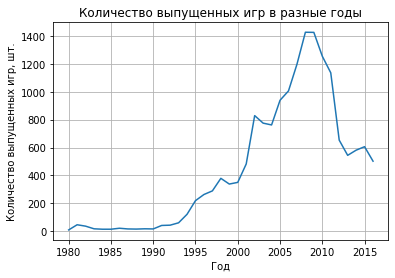

In [47]:
plt.plot(df.groupby('year_of_release')['year_of_release'].count())
plt.title('Количество выпущенных игр в разные годы')
plt.xlabel('Год')
plt.ylabel('Количество выпущенных игр, шт.')
plt.grid()
plt.show()

Рост выпуска игр начался с начала 90-х годов. Пик выпуска игр, как ранее отмечали, приходится на 2008 - 2009 год, потом падение.

In [48]:
(df
 .groupby('platform')['total_sales'].sum()
 .to_frame()
 .round(2)
 .sort_values('total_sales', ascending = False).head(10)
 .style
 .background_gradient(cmap="Greens")
)

,total_sales
platform,
ps2,1233.56
x360,961.24
ps3,931.34
wii,891.18
ds,802.78
ps,727.58
ps4,314.14
gba,312.88
psp,289.53


Больше всего продаж пришлось на платформы `ps2`, `x360`, `ps3`, `wii`, `ds` и `ps`. Далее идет уже заметный спад, что также показано бледно-зеленым цветом.

In [49]:
top6_platforms = ['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps']

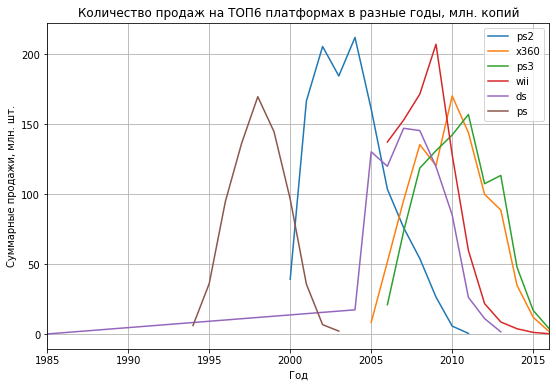

In [50]:
for column in top6_platforms:
    df_top6 = df.query('platform == @column').groupby('year_of_release')['total_sales'].sum()
    df_top6.plot(grid = True, figsize = (9,6))
    plt.legend(top6_platforms)
    plt.title('Количество продаж на ТОП6 платформах в разные годы, млн. копий')
    plt.xlabel('Год')
    plt.ylabel('Суммарные продажи, млн. шт.')

- Платформы живут около 10 лет. Пик продаж приходится где-то чуть ранее середины жизни платформы. Далее идет спад, возможно, из-за устаревания платформы и выхода новой.

In [51]:
df['year_of_release'].loc[df['platform'] == 'ds'].min()

1985

In [52]:
df.loc[(df['platform'] == 'ds')&(df['year_of_release'] < 2004)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,strongest tokyo university shogi ds,ds,1985,action,0.0,0.0,0.02,0.0,NaN,NaN,NaN,0.02


 - Игра была выпущена в 1985 году для игры на платформе DS. Сильнейший токийский университет Shogi DS в основном определяется как жанр Action.
 - Возможно это DS не та DS, что вышла в 2004 году.

Посмотрим какие платформы существовали в разные годы.

In [53]:
df.groupby('year_of_release')['platform'].unique()

year_of_release
1980                                               [2600]
1981                                               [2600]
1982                                               [2600]
1983                                          [nes, 2600]
1984                                          [nes, 2600]
1985                                  [nes, 2600, pc, ds]
1986                                          [nes, 2600]
1987                                          [nes, 2600]
1988                                  [nes, gb, 2600, pc]
1989                                      [gb, nes, 2600]
1990                                 [snes, nes, gb, gen]
1991                                 [snes, gen, gb, nes]
1992                         [gb, snes, gen, pc, nes, gg]
1993                            [snes, nes, scd, gen, ng]
1994      [snes, gb, pc, gen, ps, sat, ng, scd, nes, 3do]
1995               [snes, pc, ps, gb, sat, ng, tg16, 3do]
1996               [gb, n64, ps, pc, snes, sat, ng, pcfx

- Основываясь на том, что ТОП-6 платформ начинает свою жизнь с 1994 года, то актуальный период выбираем с 1994 года по 2016.
- Создадим для этого периода новую базу данных `df_94`.

In [54]:
temp = df.groupby('platform')['year_of_release'].agg([min,max]).reset_index()
temp.head(2)

,platform,min,max
0,2600,1980,1989
1,3do,1994,1995


In [55]:
temp['delta'] = temp['max'] - temp['min']
print('Срок жизни платформы около = ', temp['delta'].median())

Срок жизни платформы около =  6.0


In [56]:
df_13 = df.loc[df['year_of_release'] >= 2013]
df_13

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,strawberry nauts,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,aiyoku no eustia,psv,2014,misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [57]:
df_13.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97,8.1,M,16.27


Определим, какие платформы лидируют по продажам на 2016 год, а также узнаем растут или падают продажи.

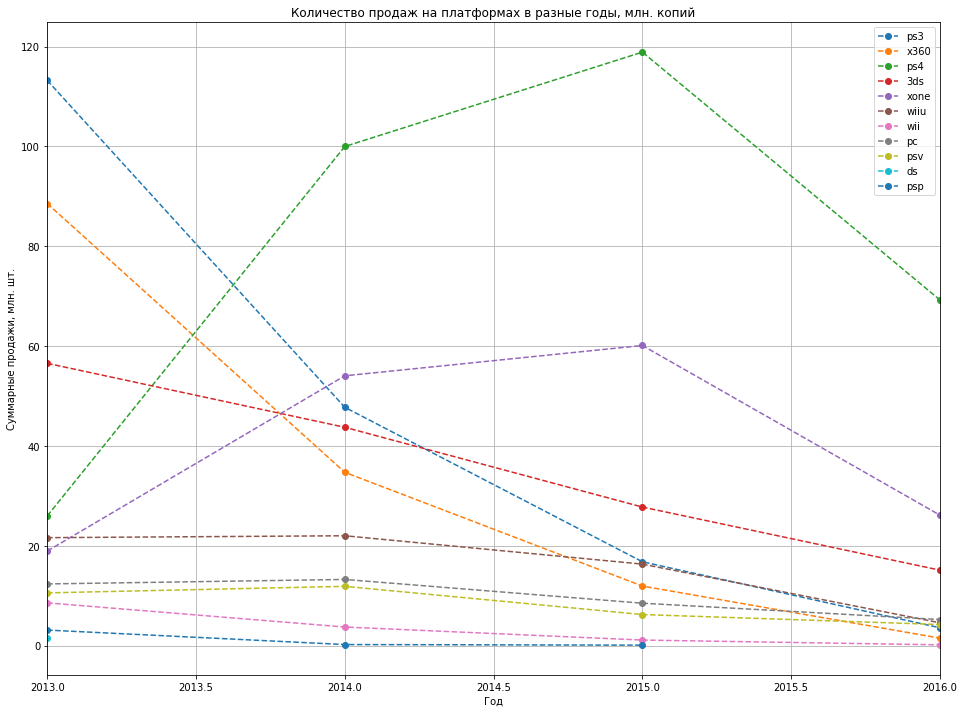

In [58]:
for column in df_13['platform'].unique():
    df_top6 = df_13.query('platform == @column').groupby('year_of_release')['total_sales'].sum()
    df_top6.plot(grid = True, figsize = (16,12), style='o--')
    plt.legend(df_13['platform'].unique())
    plt.title('Количество продаж на платформах в разные годы, млн. копий')
    plt.xlabel('Год')
    plt.ylabel('Суммарные продажи, млн. шт.')

- С 2014 года вперед по продажам вырываются платформы `ps4`, `xone` и `3ds`. Однако и у них падают продажи.

_Примечание:_
- `ps4` - продажи игровой платформы стартовали 15 ноября 2013 года.
- `xone` - продажи игровой платформы стартовали 22 ноября 2013 года.
- `3ds` - продажи игровой платформы стартовали 26 февраля 2011 года.

In [59]:
df_13.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97,8.1,M,16.27


Проанализируем данные по ТОП-6 платформам с 1994 года.

In [60]:
top3_platforms = ['ps4', 'xone', '3ds']

In [61]:
df_13_top3 = df_13.query("platform.isin(@top3_platforms)")

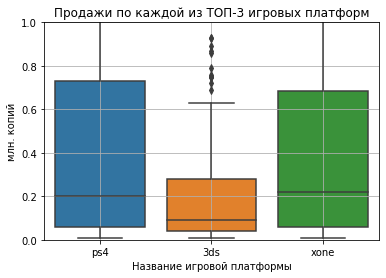

In [62]:
sns.boxplot(data = df_13_top3, x = 'platform', y = 'total_sales')
plt.ylim(0,1)
plt.title('Продажи по каждой из ТОП-3 игровых платформ')
plt.ylabel('млн. копий')
plt.xlabel('Название игровой платформы')
plt.grid(True)
plt.show()

- Медиана продаж находится около 200 тыс. копий для  игровых платформ `ps4` и `xone`, для платформы `ds`- Nintendo DS, здесь медиана около 80 тыс. копий. `ps4` и `xone` явные конкуренты.
- Лидируют по продажам полноценные игровые платформы. Предположу, что "карманные приставки" вымирают, т.к. смартфоны пришли на замену.

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

#### Рассмотрим платформу `ps2`, как самую крупную по продажам.

In [63]:
df_13.query('platform == "ps4"').head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97,8.3,M,12.62


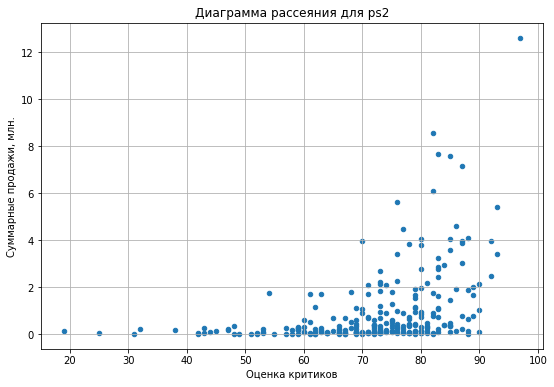

In [64]:
df_13.query('platform == "ps4"').plot.scatter(x='critic_score', y='total_sales', figsize = (9,6), grid = True)
plt.title('Диаграмма рассеяния для ps2')
plt.xlabel('Оценка критиков')
plt.ylabel('Суммарные продажи, млн.')
plt.show()

In [65]:
df_13.query('platform == "ps4"').loc[df_13['total_sales'] > 10]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97,8.3,M,12.62


- Игры, имеющие высокую оценку критиков, продаются лучше или наооборот, те игры, которые продаются хорошо, критики оценивают выше. Причинно-следственная связь неизвестна. 
- По платформе `ps4` игра `grand theft auto v` имела выдающийся успех.	

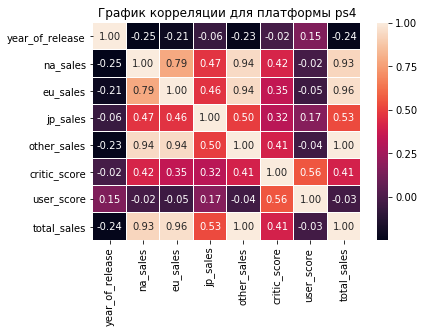

In [66]:
sns.heatmap(df_13.loc[df['platform'] == 'ps4'].corr(), annot=True, fmt=".2f", linewidths=0.01)
plt.title('График корреляции для платформы ps4')
plt.show()

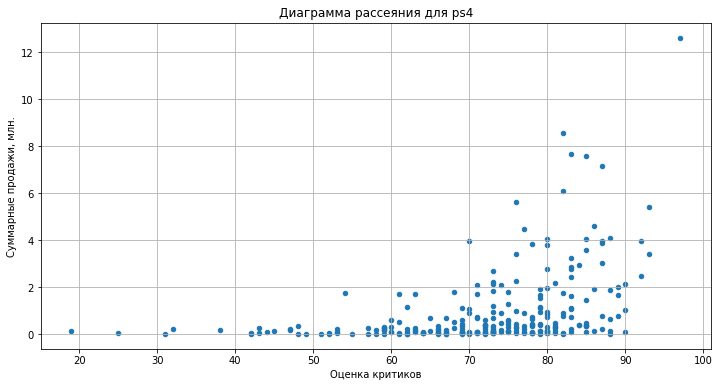

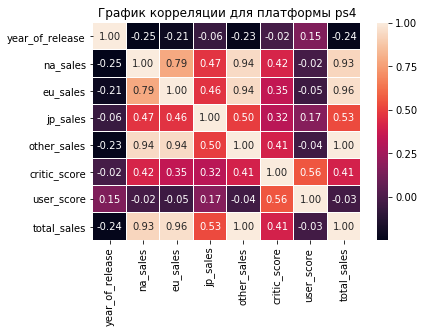

Для игровой платформы - ps4 -:
- значение корреляции между суммарными продажами и оценкой критиков = 0.41
- значение корреляции между суммарными продажами и оценкой пользователей = -0.03
____________________________________________________________________________________________________


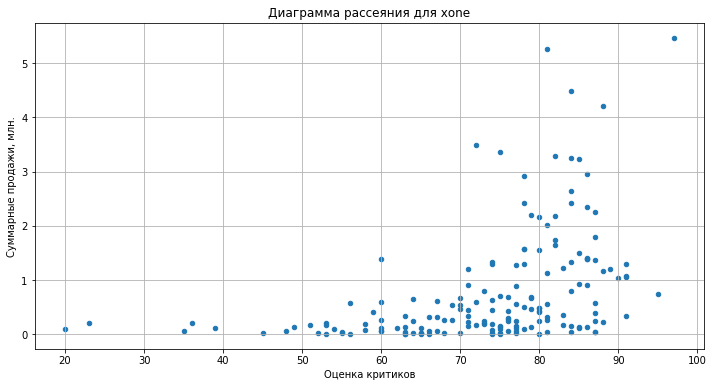

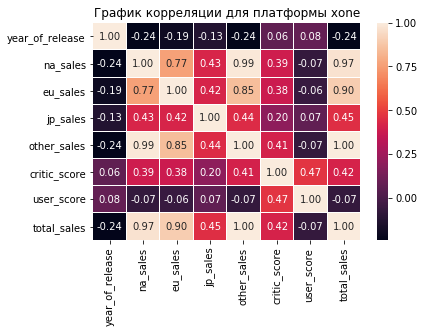

Для игровой платформы - xone -:
- значение корреляции между суммарными продажами и оценкой критиков = 0.42
- значение корреляции между суммарными продажами и оценкой пользователей = -0.07
____________________________________________________________________________________________________


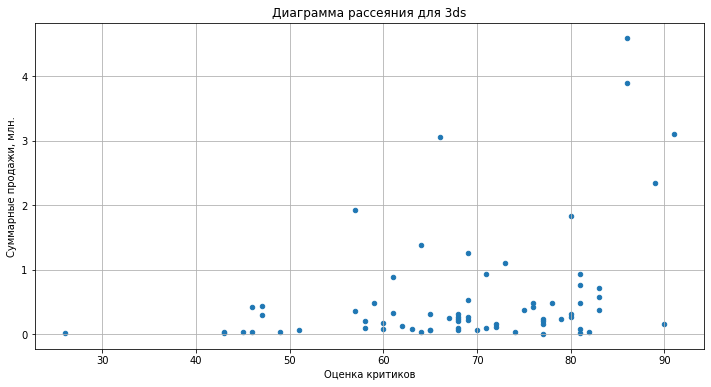

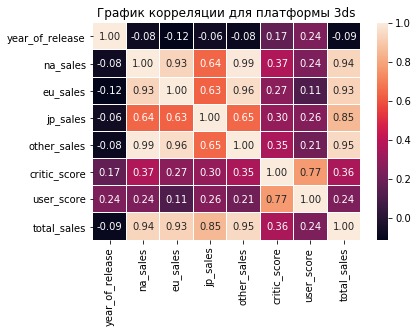

Для игровой платформы - 3ds -:
- значение корреляции между суммарными продажами и оценкой критиков = 0.36
- значение корреляции между суммарными продажами и оценкой пользователей = 0.24
____________________________________________________________________________________________________


In [67]:
for platform in top3_platforms:
    df_13.query('platform == @platform').plot.scatter(x='critic_score', y='total_sales', figsize = (12,6), grid = True)
    
    plt.title('Диаграмма рассеяния для ' + platform)
    plt.xlabel('Оценка критиков')
    plt.ylabel('Суммарные продажи, млн.')
    plt.show()

    temp = df_13.loc[df['platform'] == platform]
    temp['critic_score'] = temp['critic_score'].astype(float)
    sns.heatmap(temp.corr(), annot=True, fmt=".2f", linewidths=0.01)
    plt.title('График корреляции для платформы ' + platform)
    plt.show()
    print('Для игровой платформы -', platform,'-:')
    print('- значение корреляции между суммарными продажами и оценкой критиков =', temp['total_sales'].corr(temp['critic_score']).round(2))
    print('- значение корреляции между суммарными продажами и оценкой пользователей =', temp['total_sales'].corr(temp['user_score']).round(2))
    print('_' * 100)

- Игровые платформы из ТОП3 можно поделить на две части:
    - полноценные игровые консоли (`ps4`, `xone`)
    - карманные игровые приставки (`3ds`)

- Для полноценных консолей оценка критиков имеет большую корреляцию с общими продажами, чем у карманных. Здесь или критики хорошо оценивают то, что хорошо продается, или наоборот. Я бы отдельно изучил вопрос объективности критиков и ангажированности их с некоторыми корпорациями.
- Для карманной приставки `3ds` в отличие от полноценных значение корреляции между `user_score` и `total_sales` уже ненулевое и равно 0,24.

Корреляция по всему датафрейму df_13.

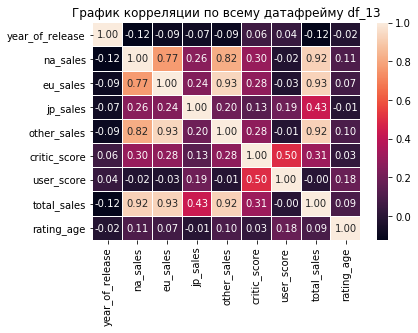

- значение корреляции между суммарными продажами и оценкой критиков = 0.31
- значение корреляции между суммарными продажами и оценкой пользователей = -0.003
____________________________________________________________________________________________________


In [102]:
temp = df_13
temp['critic_score'] = temp['critic_score'].astype(float)
sns.heatmap(temp.corr(), annot=True, fmt=".2f", linewidths=0.01)
plt.title('График корреляции по всему датафрейму df_13')
plt.show()
print('- значение корреляции между суммарными продажами и оценкой критиков =', temp['total_sales'].corr(temp['critic_score']).round(2))
print('- значение корреляции между суммарными продажами и оценкой пользователей =', temp['total_sales'].corr(temp['user_score']).round(3))
print('_' * 100)

- Для всех данных имеется корреляция между оценкой критиков и продажами в то время, как сильной связи с оценкой пользователей нет.

#### Посмотрим на общее распределение игр по жанрам.

In [69]:
(df_13
 .groupby('genre')['name'].count()
 .to_frame()
 .sort_values('name', ascending = False)
 .style
 .background_gradient(cmap="Greens")
)

,name
genre,
action,766
role-playing,292
adventure,245
sports,214
shooter,187
misc,155
racing,85
fighting,80
platform,74


In [70]:
(df_13
 .groupby('genre')['total_sales'].sum()
 .to_frame()
 .sort_values('total_sales', ascending = False)
 .style
 .background_gradient(cmap="Greens")
)

,total_sales
genre,
action,321.87
shooter,232.98
sports,150.65
role-playing,145.89
misc,62.82
platform,42.63
racing,39.89
fighting,35.31
adventure,23.64


- Наиболее продаваемый жанр это `action`, менее продаваемый `puzzle`. Отсюда вывод, что люди предпочитают бегать, стрелять, крушить и ломать, но не логические игры. Этот вывод подтверждает и то, что стратегии `strategy`, которые немного заставляют думать, также покупают неохотно.
- Есть близкие жанры, например `action` и `shooter`. Если их объединить, то сортировка сдвинется, но вывод предыдущего пункта останется в силе.
- Производители подстраиваются под интересы, поэтому игр с жанров `action` и `sports` выпускается больше, `puzzle` - меньше.

In [1]:
(df_13
 .groupby('genre')['total_sales'].median()
 .to_frame()
 .sort_values('total_sales', ascending = False)
 .style
 .background_gradient(cmap="Greens")
)

NameError: name 'df_13' is not defined

- Шутеры (они же часто и экш-игры) продаются дороже, чем все остальные. Второе место между спортом и жанром `platform`. Логические игры продаются за меньшую сумму.

Платфо́рмер — жанр компьютерных игр, в которых основной чертой игрового процесса является прыгание по платформам, лазанье по лестницам, собирание предметов, обычно необходимых для завершения уровня. Игры подобного жанра характеризуются нереалистичностью, рисованной мультяшной графикой. 

## Шаг 4. Составьте портрет пользователя каждого региона


Добавим в таблицу `df_13` столбец `rating_age`, в который передадим численное значение возраста.

In [72]:
df_13['rating_age'] = np.NaN

In [73]:
# функция преобразования кодового рейтинга в числовой
def rating_age(row):
    if row['rating'] == 'E':
        row['rating_age'] = 6
    if row['rating'] == 'M':
        row['rating_age'] = 17
    if row['rating'] == 'T':
        row['rating_age'] = 13
    if row['rating'] == 'E10+':
        row['rating_age'] = 10
    if row['rating'] == 'AO':
        row['rating_age'] = 18       
    if row['rating'] == 'EC':
        row['rating_age'] = 3
    return row['rating_age']

In [74]:
df_13['rating_age'] = df_13.apply(rating_age ,axis=1)

In [75]:
df_13.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,rating_age
16,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97,8.2,M,21.05,17.0
23,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97,8.1,M,16.27,17.0
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63,NaN
33,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60,NaN
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97,8.3,M,12.62,17.0
47,pokemon omega ruby/pokemon alpha sapphire,3ds,2014,role-playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68,NaN
60,call of duty: ghosts,x360,2013,shooter,6.73,2.56,0.04,0.91,73,2.6,M,10.24,17.0
69,call of duty: ghosts,ps3,2013,shooter,4.10,3.63,0.38,1.25,71,2.6,M,9.36,17.0
72,minecraft,x360,2013,misc,5.70,2.65,0.02,0.81,NaN,NaN,NaN,9.18,NaN
77,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58,6.0


In [76]:
df_13['rating_age'].unique()

array([17., nan,  6., 13., 10.])

Столбец добавлен успешно.

Создадим для каждого региона отдельную базу данных:
- df_EU - для Европы.
- df_NA - для Северной Америки.
- df_JP - для Японии.

In [77]:
df_EU = df_13.query('eu_sales >= 0')
df_NA = df_13.query('na_sales >= 0')
df_JP = df_13.query('jp_sales >= 0')

In [78]:
def info_df(df, region_sales):
    
    display (df
    .groupby('platform')[region_sales].sum()
    .to_frame()
    .sort_values(region_sales, ascending = False).head(5)
    .style
    .background_gradient(cmap="Greens")
    )
    
    display (df
    .groupby('genre')[region_sales].sum()
    .to_frame()
    .sort_values(region_sales, ascending = False).head(5)
    .style
    .background_gradient(cmap="Greens")
    )
    
    return

In [79]:
#Данные по Европе
info_df(df_EU, 'eu_sales')

,eu_sales
platform,
ps4,141.09
ps3,67.81
xone,51.59
x360,42.52
3ds,30.96


,eu_sales
genre,
action,118.13
shooter,87.86
sports,60.52
role-playing,36.97
racing,20.19


In [80]:
#Данные по Северной Америке
info_df(df_NA, 'na_sales')

,na_sales
platform,
ps4,108.74
xone,93.12
x360,81.66
ps3,63.5
3ds,38.2


,na_sales
genre,
action,126.05
shooter,109.74
sports,65.27
role-playing,46.4
misc,27.49


In [81]:
#Данные по Японии
info_df(df_JP, 'jp_sales')

,jp_sales
platform,
3ds,67.81
ps3,23.35
psv,18.59
ps4,15.96
wiiu,10.88


,jp_sales
genre,
role-playing,51.04
action,40.49
misc,9.2
fighting,7.65
shooter,6.61


- В целом пользовательские предпочтения в Америке и Европе схожи. И там, и там приставки от Sony конкурируют с приставками от Microsoft. Однако в Европе игры для play station лидируют по продажам, нежели игры для приставок от Microsoft. В Америке игры для Sony и Microsoft имеют паритет по продажам.
- По игровым жанрам и Америка, и Европа имеют одинаковые предпочтения. Наиболее популярны стрелялки (action, shooter) и спортивные игры.
- Япония выделяется среди других двух регионов. Здесь актуальны игры под карманные приставки. Топ по продажам занимают игры для карманной приставки `3ds`. Есть предположение, что эти приставки изначально комплектуюся пакетом игр. Также в Японии в топ5 не попали приставки от Microsoft.
- Жанровые предпочтения в Японии также отличаются от Америки и Европы. Здесь популярны компьютерные ролевые игры и экш-жанр. Можно предположить, что компьютерные ролевые игры здесь популярны из-за использования карманных приставок, а также из-за любви японцев к своим мультикам в стиле аниме.

In [82]:
print('Корреляция продаж от возрастного рейтинга в Японии =', df_JP['rating_age'].corr(df_JP['jp_sales']).round(2))

Корреляция продаж от возрастного рейтинга в Японии = -0.01


In [83]:
print('Корреляция продаж от возрастного рейтинга в Европе =', df_EU['rating_age'].corr(df_EU['eu_sales']).round(2))

Корреляция продаж от возрастного рейтинга в Европе = 0.07


In [84]:
print('Корреляция продаж от возрастного рейтинга в Северной Америке =', df_NA['rating_age'].corr(df_NA['na_sales']).round(2))

Корреляция продаж от возрастного рейтинга в Северной Америке = 0.11


In [85]:
df_JP.groupby('rating_age')['jp_sales'].sum().sort_values()

rating_age
10.0     5.89
17.0    14.11
6.0     15.14
13.0    20.59
Name: jp_sales, dtype: float64

In [86]:
df_EU.groupby('rating_age')['eu_sales'].sum().sort_values()

rating_age
13.0     41.95
10.0     42.69
6.0      83.36
17.0    145.32
Name: eu_sales, dtype: float64

In [87]:
df_NA.groupby('rating_age')['na_sales'].sum().sort_values()

rating_age
13.0     49.79
10.0     54.24
6.0      79.05
17.0    165.21
Name: na_sales, dtype: float64

- Здесь по Америке и Европе схожие показатели. Сумма продаж игр с возрастом 17+ здесь на первом месте, в то время как в Японии этот показатель 13+. Есть предположение, что средний игрок в Японии моложе, чем в Америке или Европе.

## Шаг 5. Проверка гипотез


#### Гипотеза №1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

- Гипотеза H₀ — средние пользовательские рейтинги платформ Xbox One и PC равны.
- Гипотеза H₁ — средние пользовательские рейтинги платформ Xbox One и PC различны.
- Критический уровень статистической значимости alpha = 1%, т.к. объем выборки у нас достаточно большой.

In [88]:
df_xone = df_13.loc[(df_13['platform'] == 'xone') & (df['user_score'].notnull()),'user_score']
df_pc = df_13.loc[(df_13['platform'] == 'pc') & (df['user_score'].notnull()),'user_score']

In [89]:
[np.var(x, ddof=1) for x in [df_xone, df_pc]]

[1.9069968429360695, 3.035892752408882]

Дисперсии неравны (разница около 60%) - это много, поэтому передаем параметр `equal_var = False`

In [90]:
from scipy import stats as st
import numpy as np

alpha = .01 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    df_xone, 
    df_pc, equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Хотя средние пользовательские рейтинги платформ неодинаковые, с вероятностью в почти 15% различие можно получить случайно.

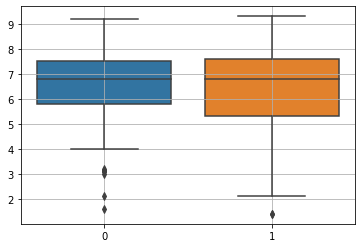

In [91]:
sns.boxplot(data = [df_xone, df_pc])
plt.grid(True)
plt.show()

In [92]:
print('Средний пользовательский рейтинг "xone":', df_xone.mean().round(2))
print('Средний пользовательский рейтинг "PC":', df_pc.mean().round(2))

Средний пользовательский рейтинг "xone": 6.52
Средний пользовательский рейтинг "PC": 6.27


#### Гипотеза №2. Средние пользовательские рейтинги жанров Action и Sports разные.

- Гипотеза H₀ — cредние пользовательские рейтинги жанров Action и Sports равны.
- Гипотеза H₁ — cредние пользовательские рейтинги жанров Action и Sports различны.
- Критический уровень статистической значимости alpha = 1%, т.к. объем выборки у нас достаточно большой.

In [93]:
df_action = df_13.loc[(df_13['genre'] == 'action') & (df['user_score'].notnull()), 'user_score']
df_sports = df_13.loc[(df_13['genre'] == 'sports') & (df['user_score'].notnull()), 'user_score']

In [94]:
[np.var(x, ddof=1) for x in [df_action, df_sports]]

[1.7693609042482705, 3.180612814465409]

Дисперсии неравны (разница около 80%) - это много, поэтому передаем параметр `equal_var = False`

In [95]:
from scipy import stats as st
import numpy as np

alpha = .01 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    df_action, 
    df_sports, equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


Средние пользовательские рейтинги жанров Action и Sports различны.

In [96]:
print('Средний пользовательский рейтинг жанра "Action":', df_action.mean().round(2))
print('Средний пользовательский рейтинг жанра "Sports":', df_sports.mean().round(2))

Средний пользовательский рейтинг жанра "Action": 6.84
Средний пользовательский рейтинг жанра "Sports": 5.24


## Общий вывод:

- На конец 2016 на рынке большей популярностью пользуются полноценные игровые приставки. Поэтому стоит обратить внимание на те игры, которые запускаются на современных игровых консолях PlayStation и XBox.
- По жанру лучше заходят простые игры, не требующие особой вдумчивости. Поэтому в сторону рекламы логических игр и даже стратегий лучше не смотреть, если у этой категории игр не начнет расти популярность.
- Оценка пользователей практически не оказывает влияние на продажи игр, в то время, как оценка критиков имеет положительную корреляцию с количеством продаж.
- Можно попробовать заработать на умирающем рынке карманных приставок, в частности в Японии. Но смартфоны предположительно вытесняют такие приставки.
- Рынки Северной Америки и Европы достаточно похожи в то время, как рынок Японии имеет особенности. В Японии популярны игры жанра `role-playing`, в т.ч. игры похожие на их аниме.